In [1]:
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np

In [2]:
sim = rebound.Simulation.from_file("checkpoint.bin")
sim.status()

---------------------------------
REBOUND version:     	3.7.2
REBOUND built on:    	Jan 31 2019 09:37:22
Number of particles: 	10
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.0010157112973492918 y=0.007488730361825614 z=-5.069533736898837e-05 vx=-0.0029328720427306775 vy=0.0006155424014823996 vz=7.56272178380342e-05>
<rebound.Particle object, m=1.6601141530543488e-07 x=0.318037998169637 y=-0.23925513111096758 z=-0.04948219703090178 vx=4.2567040876537705 vy=8.607331159042683 vz=0.3125908459695051>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.7022578873416416 y=-0.15564336442243198 z=0.03817797548211421 vx=1.623166596267045 vy=-7.227832794574069 vz=-0.19294622264815264>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.6769295705265821 y=0.7246579288413936 z=-8.129822623584453e-05 vx=-4.678380415993614 vy=-4.332952208298205 vz=0.000285868887266

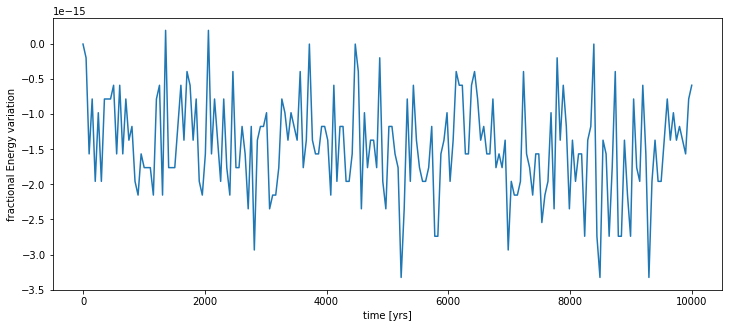

In [3]:
sim.t = 0
sim.move_to_com()
Noutputs = 200
years = 10000.
energy_0 = sim.calculate_energy()
energy_deltas = np.zeros(Noutputs)
times = np.zeros(Noutputs)
i = 0
for time in np.linspace(0,years,Noutputs):
    #print(time)
    
    sim.integrate(time)
    energy_deltas[i] = sim.calculate_energy()- energy_0
    times[i] = time
    i += 1
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("fractional Energy variation")

plt.plot(times, energy_deltas/energy_0);

In [15]:
print(np.max(np.abs(energy_deltas)))
print(energy_0)
print(sim.dt)

1.3010426069826053e-17
-0.004432583728314775
0.0022684941088623413
